<h2> Loan Eligibility Predicition </h2>

It is a set of criteria on basis of which any financial institute evaluates the eligibility of a customer for a particular loan.

<h1> You can Download the dataset from: </h1>
<h1> https://www.kaggle.com/vikasukani/loan-eligible-dataset </h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
dataset1 = pd.read_csv('C:/Users/vatsa/Desktop/data analysis project/Project 2/loan-train.csv')
dataset1
dataset1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [10]:
dataset1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
pd.crosstab(dataset1['Credit_History'], dataset1['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<h3> From above Code We from Cross Relation betweeen Credit History and Loan Status.
From above we can infer that customers having credit history 1.0 tend be more eligible for the loan when compared to Credit History of 0.0 </h3>

<AxesSubplot:>

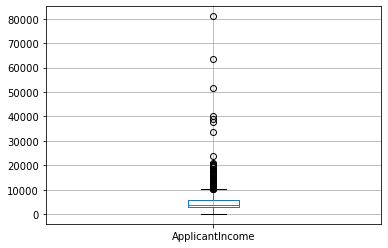

In [15]:
dataset1.boxplot(column = 'ApplicantIncome')

<AxesSubplot:>

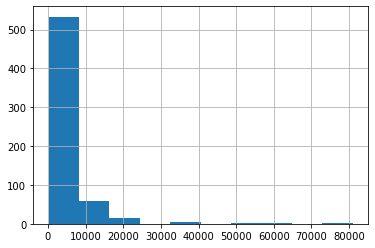

In [18]:
dataset1['ApplicantIncome'].hist()

<AxesSubplot:>

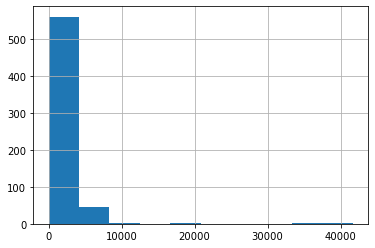

In [19]:
dataset1['CoapplicantIncome'].hist()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

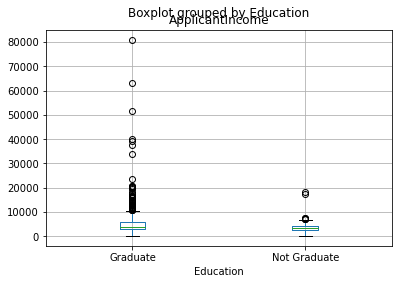

In [21]:
dataset1.boxplot(column = 'ApplicantIncome', by = 'Education')

<h3> From the above graph we infer that non-graduate people have income less than 20,000 and graduate people have income ranging from 10,000 to 80,000</h3>

<AxesSubplot:>

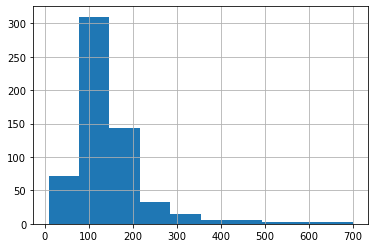

In [22]:
dataset1['LoanAmount'].hist()

<AxesSubplot:>

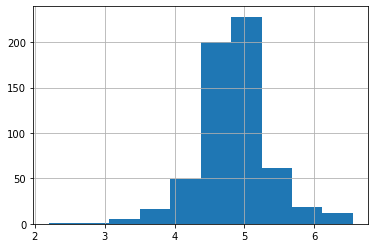

In [23]:
dataset1['LoanAmount__Normalized'] = np.log(dataset1['LoanAmount'])
dataset1['LoanAmount__Normalized'].hist()

In [24]:
dataset1.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status                0
LoanAmount__Normalized    22
dtype: int64

In [40]:
dataset1['Gender'].fillna(dataset1['Gender'].mode()[0],inplace = True)

In [41]:
dataset1['Married'].fillna(dataset1['Married'].mode()[0],inplace = True)

In [42]:
dataset1['Dependents'].fillna(dataset1['Dependents'].mode()[0],inplace = True)

In [43]:
dataset1['Self_Employed'].fillna(dataset1['Self_Employed'].mode()[0],inplace = True)

<h3> All these above values are categorical values
    So What it does is that it will find the mode of the values which are not null and according to that it will give values inplace of null values </h3>

In [44]:
dataset1.LoanAmount = dataset1.LoanAmount.fillna(dataset1.LoanAmount.mean())
dataset1.LoanAmount__Normalized = dataset1.LoanAmount__Normalized.fillna(dataset1.LoanAmount__Normalized.mean())


### Since loanamount is not categorical we'll use mean values to replace the null spaces

In [45]:
dataset1['Loan_Amount_Term'].fillna(dataset1['Loan_Amount_Term'].mode()[0],inplace = True)

In [46]:
dataset1['Credit_History'].fillna(dataset1['Credit_History'].mode()[0],inplace = True)

In [47]:
dataset1.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
LoanAmount__Normalized    0
dtype: int64

We can see that all the null values have been replaced to some actual values 

In [50]:
dataset1['TotalIncome'] = dataset1['ApplicantIncome'] + dataset1['CoapplicantIncome']
dataset1['TotalIncome__Normalized'] = np.log(dataset1['TotalIncome'])

<AxesSubplot:>

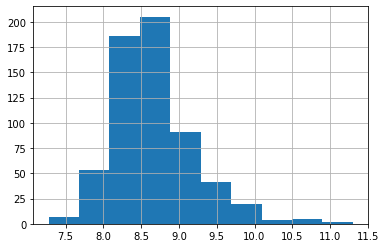

In [51]:
dataset1['TotalIncome__Normalized'].hist()

In [52]:
dataset1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount__Normalized,TotalIncome,TotalIncome__Normalized
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [56]:
X = dataset1.iloc[:, np.r_[1:5,9:11,13:15]].values      #### INDEPENDENT VARIABLES
y = dataset1.iloc[:, 12].values                          #### DEPENDENT VARIABLES

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [61]:
for i in range(0,5):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

In [62]:
X_train[:,7] = labelencoder_X.fit_transform(X_train[:,7])

<h3>We use encoder and change the values to numerical values for the system to understand </h3>
 

In [73]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [69]:
for i in range(0,5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])

In [70]:
X_test[:,7] = labelencoder_X.fit_transform(X_test[:,7])

In [72]:
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [75]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [76]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [79]:
y_pred = DTClassifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int32)

In [80]:
from sklearn import metrics 
print('The Accuracy of Decision Tree is: ', metrics.accuracy_score(y_pred,y_test))

The Accuracy of Decision Tree is:  0.7073170731707317


In [82]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [84]:
y_pred = NBClassifier.predict(X_test)
y_pred
print('The Accuracy of Decision Tree is: ', metrics.accuracy_score(y_pred,y_test))

The Accuracy of Decision Tree is:  0.8292682926829268


In [87]:
testdataset1 = pd.read_csv('C:/Users/vatsa/Desktop/data analysis project/Project 2/loan-test.csv')

In [88]:
testdataset1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


<h3> Since Naive Bayes gave better Accuracy therefore we will use Naive Bayes Algorithm to test our data on our dataset </h3>

In [89]:
testdataset1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [90]:
testdataset1['Gender'].fillna(testdataset1['Gender'].mode()[0],inplace = True)
testdataset1['Dependents'].fillna(testdataset1['Dependents'].mode()[0],inplace = True)
testdataset1['Self_Employed'].fillna(testdataset1['Self_Employed'].mode()[0],inplace = True)
testdataset1['LoanAmount'].fillna(testdataset1['LoanAmount'].mode()[0],inplace = True)
testdataset1['Loan_Amount_Term'].fillna(testdataset1['Loan_Amount_Term'].mode()[0],inplace = True)
testdataset1['Credit_History'].fillna(testdataset1['Credit_History'].mode()[0],inplace = True)

In [95]:
testdataset1.LoanAmount = testdataset1.LoanAmount.fillna(testdataset1.LoanAmount.mean())

In [96]:
testdataset1['LoanAmount_log'] = np.log(testdataset1['LoanAmount'])

In [99]:
testdataset1['TotalIncome'] = testdataset1['ApplicantIncome'] + testdataset1['CoapplicantIncome']
testdataset1['LoanAmount_log'] = np.log(testdataset1['TotalIncome'])

In [103]:
testdataset1['TotalIncome'] = testdataset1['ApplicantIncome'] + testdataset1['CoapplicantIncome']
testdataset1['TotalAmount_log'] = np.log(testdataset1['TotalIncome'])

In [104]:
testdataset1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalAmount_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,8.651724,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,8.428581,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,8.824678,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,8.494129,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,8.094378,3276,8.094378


In [105]:
test = testdataset1.iloc[:, np.r_[1:5,9:11,13:15]].values 

In [106]:
for i in range(0,5):
    test[:,i] = labelencoder_X.fit_transform(test[:,i])

In [107]:
test[:,7] = labelencoder_X.fit_transform(test[:,7])

In [108]:
test = ss.fit_transform(test)

In [109]:
pred = NBClassifier.predict(test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

<h3> 1 - Eligible for loan </h3>
<h3> 0 - Not Eligible for loan </h3>